In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


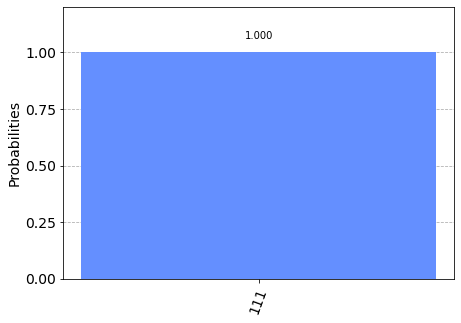

In [2]:
# Lets implement the Deutsch-Jozsa algorithm for the example of a three-bit function, with both constant and balanced oracles. 
# First let's do our imports:

# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

# set the length of the n-bit input string. 
n = 3

# Let's start by creating a constant oracle

const_oracle = QuantumCircuit(n+1)

# In this case the input has no effect on the ouput 
# so we just randomly set the output qubit to be 0 or 1:
output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

# Next, we create a balanced oracle.
balanced_oracle = QuantumCircuit(n+1)

# We can vary the input states that give 0 or 1 by wrapping some of the controls in X-gates. 
# Let's first choose a binary string of length n that dictates which controls to wrap
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

#Finally, we repeat the code from line 37  to finish wrapping the controls in X-gates:
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

# We have just created a balanced oracle! Now lets see if the Deutsch-Joza algorithm can solve it.

# Initialise the input qubits in the state  |+⟩  and the output qubit in the state  |−⟩
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle from above
dj_circuit += balanced_oracle
dj_circuit.draw()

# Perform H-gates on the  n -input qubits, and measure our input register
# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

# use local simulator to see output
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

# The results should show that we have a 0% chance of measuring 000. This correctly predicts the function is balanced.

